### 필수과제1. kfold, skf를 사용시 average가 총 3개가 나왔다.
- micro
- macro
- weighted

- 이 세 개의 차이점을 개념 정리해주시고, 직접 코드로 작성해서 정확도, 정밀도, 재현율이 어떻게 달라지는지 보여주세요!
- iris 데이터를 가지고 진행

> *Precision을 기준으로 설명하였음*

### micro (micro-averaged)

In [1]:
from IPython.display import Image

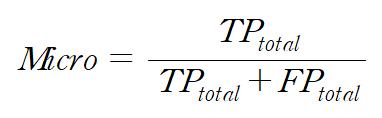

In [2]:
Image("micro.png")

- 일반적인 전체 평균
- global average
- 모든 데이터값들이 균등하게 평균에 반영된다.
- 레이블 종류가 평균에 영향을 주지 않는다.

### macro (macro-averaged)

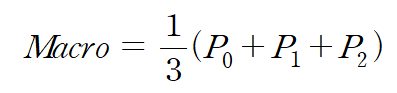

In [3]:
Image("macro.png")

- 그룹(레이블)별 평균의 평균
- unweighted mean
- 각 그룹(ex. iris 데이터의 0, 1, 2)의 평균을 구한 후, 그 평균값들을 다시 평균하여 구한다.
- 모든 레이블값이 균등하게 평균에 반영된다.
- 레이블의 비율은 평균에 영향을 주지 않는다.

### weighted (weighted-averaged)

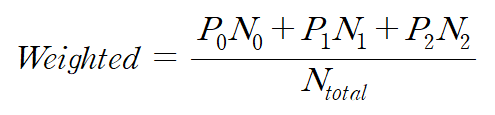

In [4]:
Image("weighted.png")

- 가중 평균
- weighted mean
- 각 그룹의 평균을 구한 후, 그 평균값들을 레이블별 데이터 수에 비례하여 다시 평균을 구한다.
- 레이블의 비율이 높을수록 해당 레이블의 평균값이 가중 평균에 영향을 많이 준다.

### 코드 구현

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score # Confusion matrix 수업 때 진행할 예정
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

- iris 데이터셋을 사용
- 수업시간에 사용한 코드를 바탕으로 진행

In [9]:
fold_iris = load_iris()

features = fold_iris.data
label = fold_iris.target

In [16]:
result_p = pd.DataFrame()
result_r = pd.DataFrame()

In [26]:
# micro-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision = []
cv_recall = []

for train_idx, test_idx in result_skfold.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="micro"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="micro"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p["micro"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r["micro"] = pd.Series(cv_recall)


1 교차검증 정밀도 :0.98 교차검증 재현율 :0.98

2 교차검증 정밀도 :0.92 교차검증 재현율 :0.92

3 교차검증 정밀도 :0.96 교차검증 재현율 :0.96



 평균 검증 정확도 0.9533333333333333 0.9533333333333333


In [28]:
# macro-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision=[]
cv_recall=[]

for train_idx, test_idx in result_skfold.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="macro"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="macro"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p["macro"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r["macro"] = pd.Series(cv_recall)


1 교차검증 정밀도 :0.981 교차검증 재현율 :0.979

2 교차검증 정밀도 :0.919 교차검증 재현율 :0.919

3 교차검증 정밀도 :0.961 교차검증 재현율 :0.961



 평균 검증 정확도 0.9536666666666666 0.953


In [29]:
# weighted-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision=[]
cv_recall=[]

for train_idx, test_idx in result_skfold.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="weighted"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="weighted"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p["weighted"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r["weighted"] = pd.Series(cv_recall)


1 교차검증 정밀도 :0.981 교차검증 재현율 :0.98

2 교차검증 정밀도 :0.92 교차검증 재현율 :0.92

3 교차검증 정밀도 :0.96 교차검증 재현율 :0.96



 평균 검증 정확도 0.9536666666666666 0.9533333333333333


In [32]:
display(result_p)
display(result_r)

,micro,macro,weighted
0,0.980000,0.981000,0.981000
1,0.920000,0.919000,0.920000
2,0.960000,0.961000,0.960000
3,0.953333,0.953667,0.953667


,micro,macro,weighted
0,0.980000,0.979,0.980000
1,0.920000,0.919,0.920000
2,0.960000,0.961,0.960000
3,0.953333,0.953,0.953333


- 검증 결과값을 보면 미세하게 차이가 남을 확인할 수 있다.
- 이번에는 레이블별 데이터수를 다르게 설정

In [67]:
# 레이블 별로 추출할 데이터
display(label[0:10])    # 0: 10개 추출
display(label[50:80])   # 1: 30개 추출
display(label[100:150]) # 2: 50개 추출 (전부 추출)

new_features = np.concatenate((features[0:10], features[50:80], features[100:150]))
new_label = np.concatenate((label[0:10], label[50:80], label[100:150]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [70]:
result_p2 = pd.DataFrame()
result_r2 = pd.DataFrame()

In [71]:
# micro-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision = []
cv_recall = []

for train_idx, test_idx in result_skfold.split(new_features, new_label):
    X_train, X_test = new_features[train_idx], new_features[test_idx]
    y_train, y_test = new_label[train_idx], new_label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="micro"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="micro"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p2["micro"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r2["micro"] = pd.Series(cv_recall)


1 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

2 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

3 교차검증 정밀도 :0.933 교차검증 재현율 :0.933



 평균 검증 정확도 0.9776666666666666 0.9776666666666666


In [72]:
# macro-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision=[]
cv_recall=[]

for train_idx, test_idx in result_skfold.split(new_features, new_label):
    X_train, X_test = new_features[train_idx], new_features[test_idx]
    y_train, y_test = new_label[train_idx], new_label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="macro"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="macro"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p2["macro"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r2["macro"] = pd.Series(cv_recall)


1 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

2 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

3 교차검증 정밀도 :0.965 교차검증 재현율 :0.933



 평균 검증 정확도 0.9883333333333333 0.9776666666666666


In [73]:
# weighted-averaged
result_skfold = StratifiedKFold(n_splits=3)
result_clf = DecisionTreeClassifier(random_state=100)
n_iter = 0 # 5번 진행 예정이니 초기값 0 먼저 지정

cv_precision=[]
cv_recall=[]

for train_idx, test_idx in result_skfold.split(new_features, new_label):
    X_train, X_test = new_features[train_idx], new_features[test_idx]
    y_train, y_test = new_label[train_idx], new_label[test_idx]
    
    #학습을 진행
    result_clf.fit(X_train, y_train)
    
    #예측
    fold_pred = result_clf.predict(X_test)
    
    #정확도 측정
    n_iter += 1
    precision = np.round(precision_score(y_test, fold_pred, average="weighted"), 3)
    recall = np.round(recall_score(y_test, fold_pred, average="weighted"), 3)
    print("\n{} 교차검증 정밀도 :{} 교차검증 재현율 :{}".format(n_iter, precision, recall))
    
    cv_precision.append(precision)
    cv_recall.append(recall)
    
print("\n")
print("\n 평균 검증 정확도", np.mean(cv_precision), np.mean(cv_recall))

cv_precision.append(np.mean(cv_precision))
result_p2["weighted"] = pd.Series(cv_precision)
cv_recall.append(np.mean(cv_recall))
result_r2["weighted"] = pd.Series(cv_recall)


1 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

2 교차검증 정밀도 :1.0 교차검증 재현율 :1.0

3 교차검증 정밀도 :0.94 교차검증 재현율 :0.933



 평균 검증 정확도 0.98 0.9776666666666666


In [74]:
display(result_p2)
display(result_r2)

,micro,macro,weighted
0,1.000000,1.000000,1.00
1,1.000000,1.000000,1.00
2,0.933000,0.965000,0.94
3,0.977667,0.988333,0.98


,micro,macro,weighted
0,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000
2,0.933000,0.933000,0.933000
3,0.977667,0.977667,0.977667


- precision의 경우, macro > micro > weighted
- recall의 경우, 세 개 모두 동일하게 나옴

- 각 레이블별 데이터 수가 부족한 경우나, 각 레이블별로 균등하게 평균에 반영하고 싶을 경우, macro가 좋다
- 레이블의 수가 많은 경우(multilabel)나, 각 레이블별로 데이터 수가 균등할 때 전체 데이터의 평균을 알고 싶을 경우, micro가 좋다
- 각 레이블별 데이터 수가 불균형하고 이를 평균에 반영하고 싶은 경우, weighted가 좋다.